# Support Vector Machine

#### In the SVM algorithm, we plot each observation as a point in an n-dimensional space (where n is the number of features in the dataset). Our task is to find an optimal hyperplane that successfully classifies the data points into their respective classes.

Before diving into the working of SVM let’s first understand the two basic terms used in the algorithm “The support vector ” and ” Hyper-Plane”.

In [2]:
import pandas as pd
df = pd.read_csv('breast-cancer.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [13]:
df.shape
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
y=df['diagnosis']
df.drop('diagnosis',axis=1,inplace=True)


In [7]:
X = df.iloc[:, :-1].values


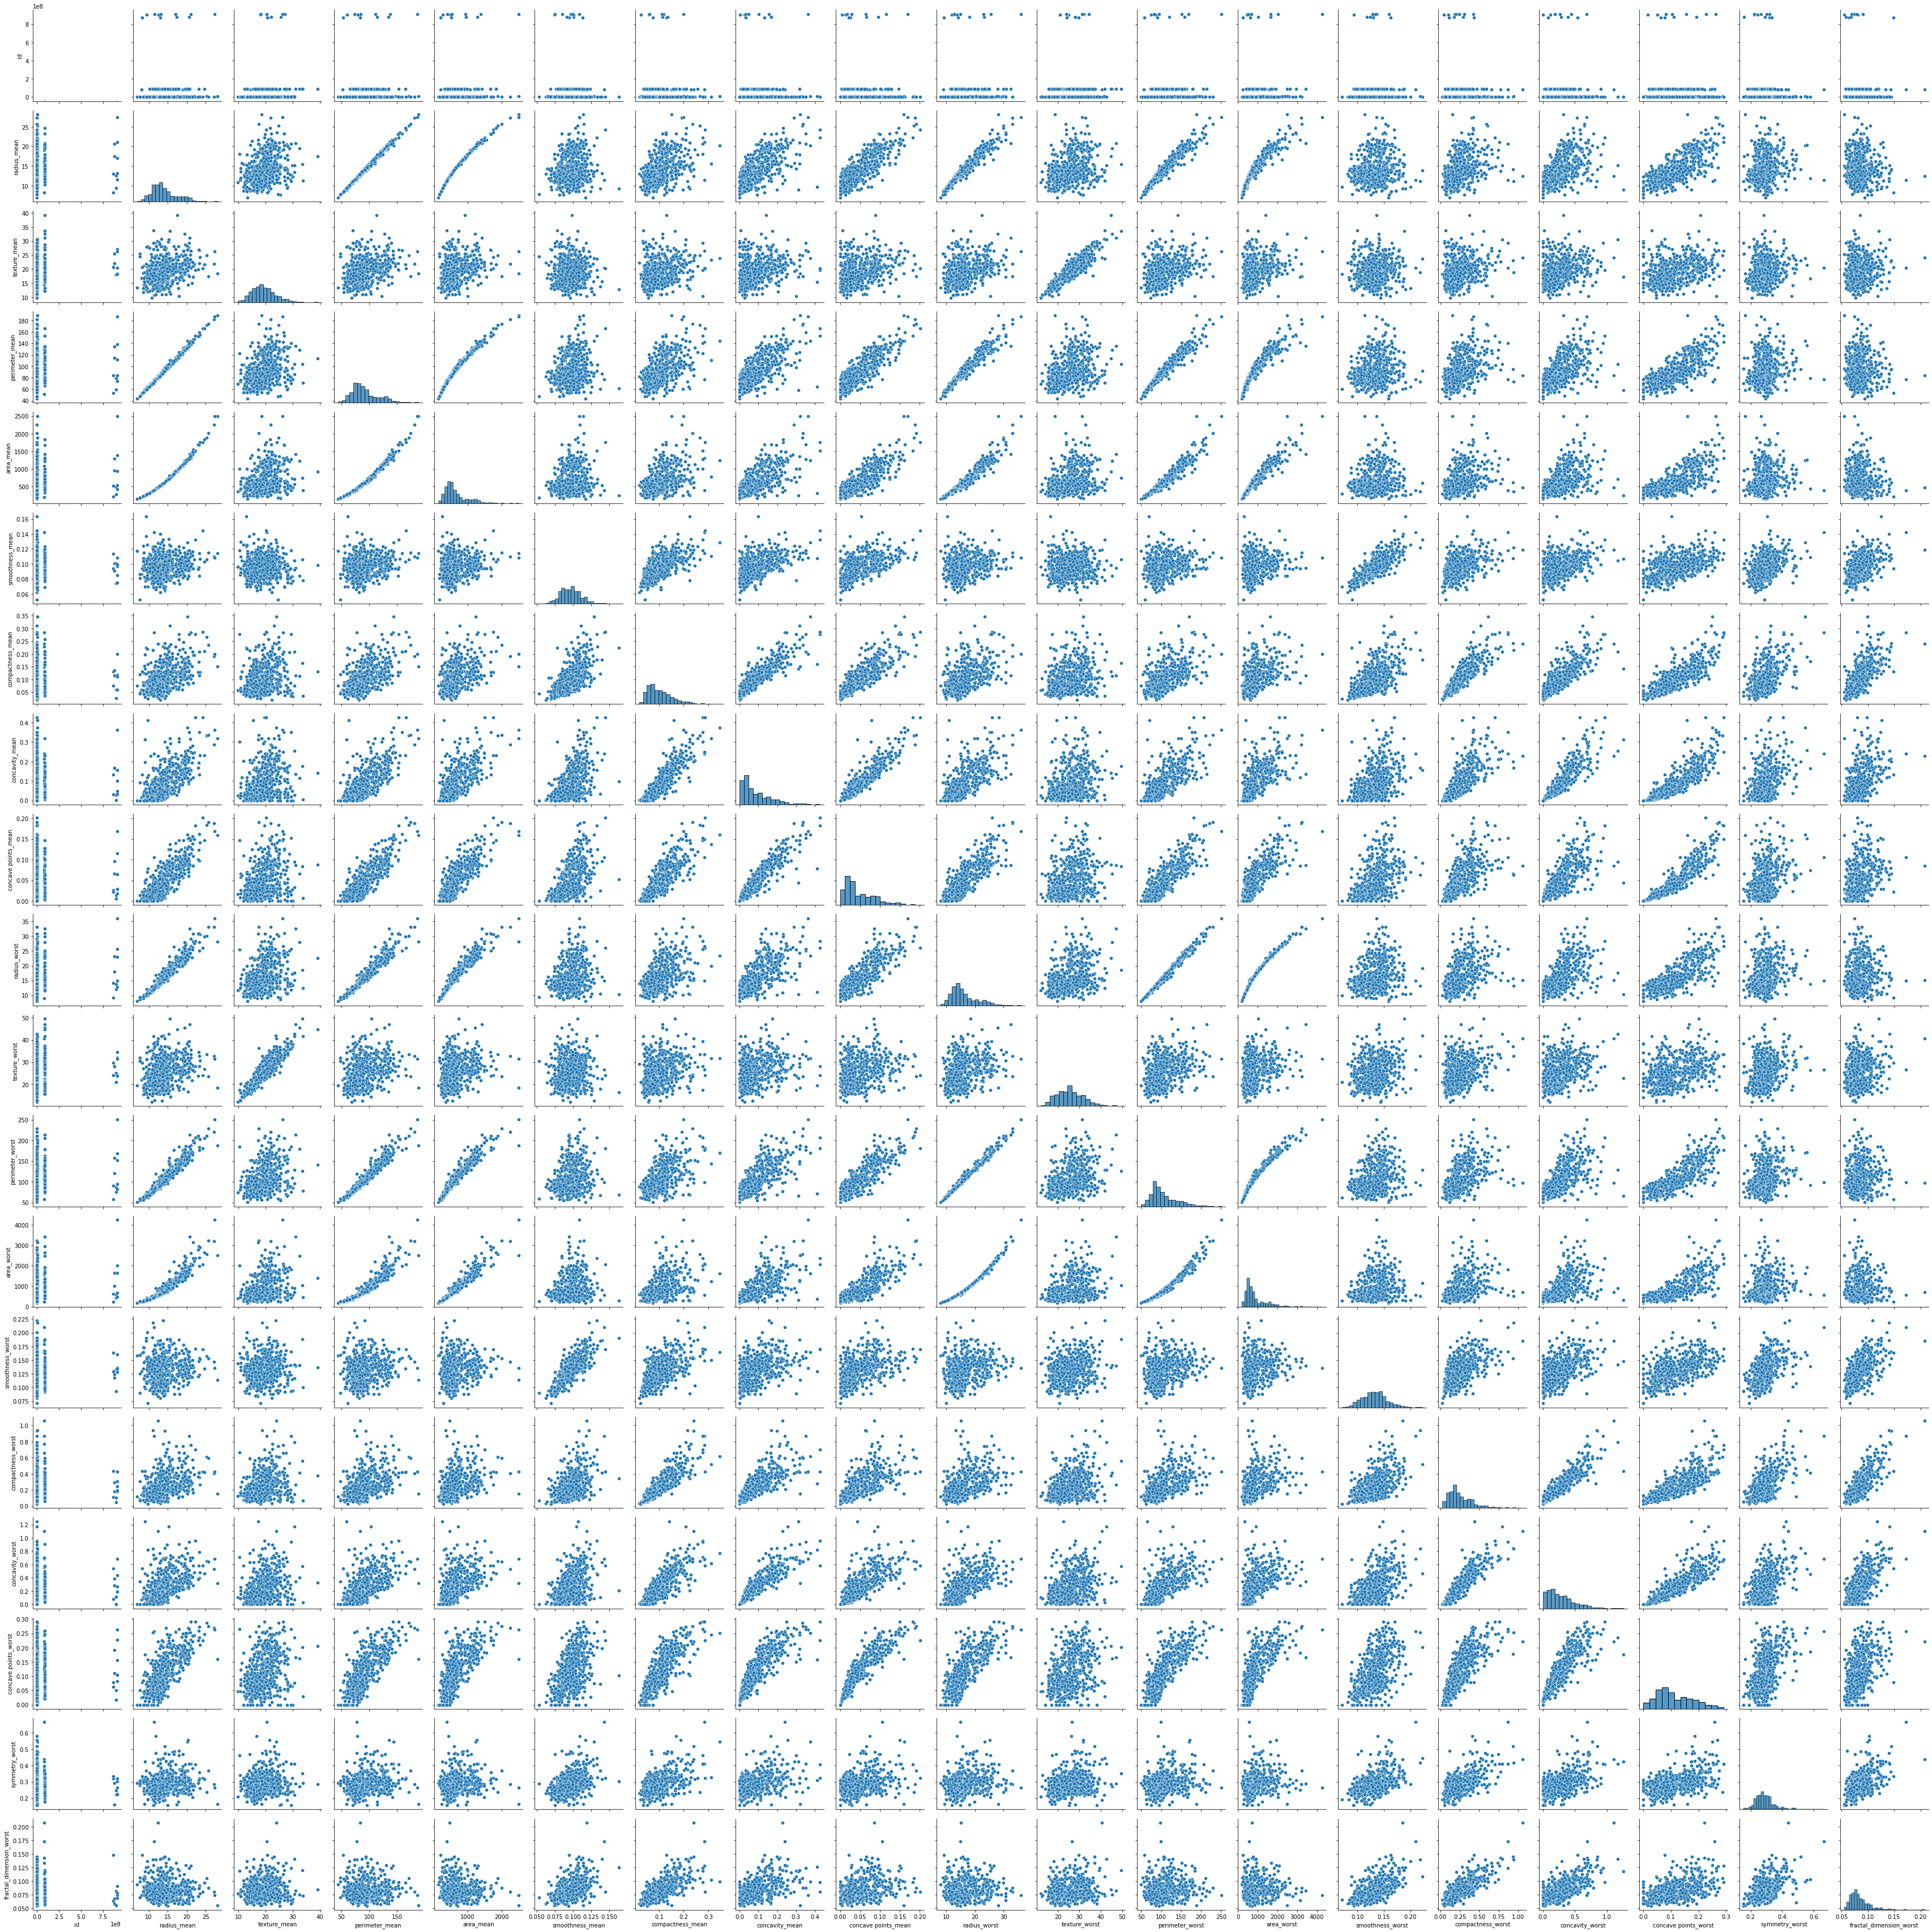

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
col=['id','radius_mean','texture_mean',
     'perimeter_mean','area_mean','smoothness_mean','compactness_mean',
     'concavity_mean','concave points_mean','radius_worst','texture_worst','perimeter_worst', 'area_worst','smoothness_worst',
     'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
sns.pairplot(df[col],height=2.5)
plt.tight_layout()
plt.show()

In [19]:
X

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 7.1190000e-01,
        2.6540000e-01, 4.6010000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 2.4160000e-01,
        1.8600000e-01, 2.7500000e-01],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 4.5040000e-01,
        2.4300000e-01, 3.6130000e-01],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 3.4030000e-01,
        1.4180000e-01, 2.2180000e-01],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 9.3870000e-01,
        2.6500000e-01, 4.0870000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 2.8710000e-01]])

In [17]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> '
      ,X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (569, 30) (569,) 
Training set  --->  (455, 30) (455,) 
Testing set   --->  (114, 30)  (114,)


In [23]:
print(X_train)

[[9.0524101e+07 1.7990000e+01 2.0660000e+01 ... 3.3010000e-01
  1.9740000e-01 3.0600000e-01]
 [8.4358402e+07 2.0290000e+01 1.4340000e+01 ... 4.0000000e-01
  1.6250000e-01 2.3640000e-01]
 [8.9346000e+04 9.0000000e+00 1.4400000e+01 ... 1.4720000e-02
  1.3890000e-02 2.9910000e-01]
 ...
 [8.5971700e+05 1.7200000e+01 2.4520000e+01 ... 6.5660000e-01
  1.8990000e-01 3.3130000e-01]
 [8.8249602e+07 1.4030000e+01 2.1250000e+01 ... 6.2310000e-02
  7.9630000e-02 2.2260000e-01]
 [8.5494100e+05 1.3030000e+01 1.8420000e+01 ... 4.8330000e-02
  5.0130000e-02 1.9870000e-01]]


In [24]:
print(X_test)

[[9.0656400e+05 1.4690000e+01 1.3980000e+01 ... 3.2190000e-01
  1.1080000e-01 2.8270000e-01]
 [8.5715000e+04 1.3170000e+01 1.8660000e+01 ... 5.0060000e-01
  2.0880000e-01 3.9000000e-01]
 [8.9167000e+05 1.2950000e+01 1.6020000e+01 ... 2.2410000e-01
  1.0560000e-01 3.3800000e-01]
 ...
 [8.5947100e+05 9.0290000e+00 1.7330000e+01 ... 1.2520000e+00
  1.7500000e-01 4.2280000e-01]
 [9.1115000e+05 1.4530000e+01 1.9340000e+01 ... 3.7790000e-01
  9.5940000e-02 2.4710000e-01]
 [9.0944601e+07 1.3780000e+01 1.5790000e+01 ... 3.5170000e-02
  3.3120000e-02 1.8590000e-01]]


In [25]:
print(y_train)

[1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 1 0 0]


In [26]:
print(y_test)

[0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0]


In [27]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [58]:
print(X_train)

[[ 0.40092183  1.0449852   0.29708512 ...  0.28422474  1.21839781
   0.29811854]
 [ 0.3564459   1.68141074 -1.14098169 ...  0.62678932  0.69716372
  -0.88595033]
 [-0.25142421 -1.44260855 -1.12732916 ... -1.26138352 -1.52233766
   0.1807324 ]
 ...
 [-0.24586718  0.82638686  1.17539807 ...  1.88432968  1.10638475
   0.72853438]
 [ 0.38451486 -0.05077356  0.43133503 ... -1.02815536 -0.54050588
  -1.1207226 ]
 [-0.24590163 -0.32748032 -0.21260945 ... -1.09666828 -0.98109057
  -1.52732096]]


In [59]:
print(X_test)

[[-4.08051978e-01  2.92635643e-01 -1.30427498e+00 ...  2.19330547e-01
   1.73162033e-02 -1.90246784e-01]
 [-4.37916737e-01 -1.97911946e-01 -9.58755925e-02 ...  1.01313899e+00
   1.64947589e+00  1.29351802e+00]
 [-4.08593863e-01 -2.68912255e-01 -7.77536786e-01 ... -2.15109667e-01
  -6.92881882e-02  5.74452130e-01]
 ...
 [-4.09765352e-01 -1.53433140e+00 -4.39288239e-01 ...  4.35095470e+00
   1.08654734e+00  1.74708265e+00]
 [-4.07885127e-01  2.40999055e-01  7.97038058e-02 ...  4.68089769e-01
  -2.30172500e-01 -6.82530353e-01]
 [ 2.86778099e+00 -1.04745272e-03 -8.36923935e-01 ... -1.05436109e+00
  -1.27642017e+00 -1.52881559e+00]]


In [29]:
from sklearn.svm import SVC

model_svc = SVC().fit(X_train, y_train)
predictions = model_svc.predict(X_test)

[[72  0]
 [ 2 40]]


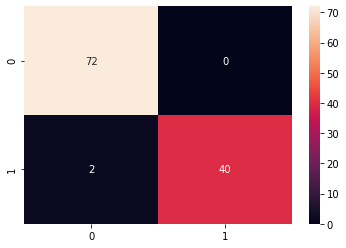

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
sns.heatmap(cm, annot=True);

In [31]:

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9824561403508771


1. Regularization (C)

In [32]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)


0.9824561403508771

In [33]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
predictions = model_C.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9824561403508771


2. Gamma

In [34]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)

predictions = model_g.predict(X_test)
print(accuracy_score(y_test, predictions))

0.631578947368421


3. Kernel

In [35]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

predictions = model_linear_kernal.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9649122807017544
